In [266]:
### import functions 
include("tensor_product_chebyshev.jl")
using Plots

### Test basic functions - plot basis fucntions in one and two dimensions

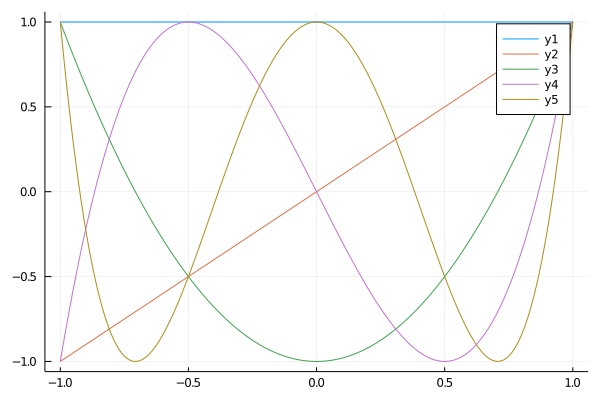

In [267]:
x = -1:0.01:1
n = 0:4
v = broadcast(n -> broadcast(x -> TP_chebyshev.T(x,n),x), n)
Plots.plot(x,v)

### Plot some of the basis functions in two dimensions

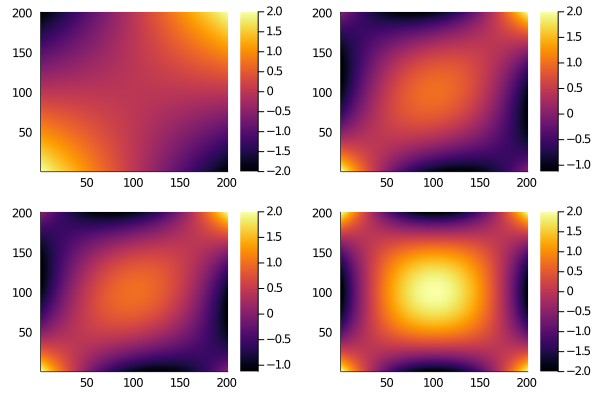

In [268]:
x = -1:0.01:1
xy = collect(Iterators.product(x,x))
alpha = (1,1)
coefs = [1]
v1 = Plots.heatmap(broadcast(x -> TP_chebyshev.T_alpha(x,(1,1), coefs), xy))
v2 = Plots.heatmap(broadcast(x -> TP_chebyshev.T_alpha(x,(1,2), coefs), xy))
v3 = Plots.heatmap(broadcast(x -> TP_chebyshev.T_alpha(x,(2,1), coefs), xy))
v4 = Plots.heatmap(broadcast(x -> TP_chebyshev.T_alpha(x,(2,2), coefs), xy))
Plots.plot(v1,v2,v3,v4,layout = 4)

### Define a function to interpolate in 1d

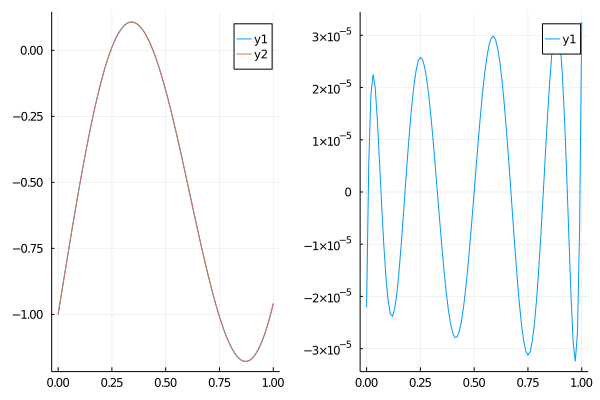

In [270]:
f(x) = x^2 - 1 + sin(5*x)
itp = TP_chebyshev.init_interpolation([0.0],[1.0],9)
itp = TP_chebyshev.update_interpolation(itp, reshape(f.(itp.nodes),9))
x = 0:0.01:1
p1 = Plots.plot(x,[TP_chebyshev.evaluate_interpolation(x,itp), f.(x)])
p2 = Plots.plot(x, TP_chebyshev.evaluate_interpolation(x,itp) .- f.(x))
plot(p1,p2,layouyt = 2)

### Define a function to interpolate in 2d

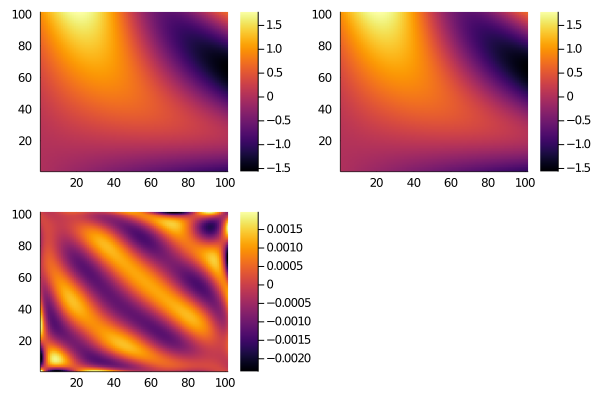

In [276]:
nodes = 10
f(x) = x[1]^2-x[2]+sin(7*x[1]*x[2])
itp = TP_chebyshev.init_interpolation([0.0,0.0],[1.0,1.0],nodes)
values = zeros(nodes,nodes)
for i in 1:nodes
    for j in 1:nodes
        values[i,j] = f([itp.nodes[i,1],itp.nodes[j,2]])
    end
end 
x = 0:0.01:1
itp = TP_chebyshev.update_interpolation(itp, values)
xy = collect(Iterators.product(x,x))
p1 = Plots.heatmap(reshape(f.(reshape(xy,length(xy))), length(x), length(x)))
p2 = Plots.heatmap(reshape(TP_chebyshev.evaluate_interpolation(reshape(xy,length(xy)),itp), length(x), length(x)))
p3 = Plots.heatmap(reshape(TP_chebyshev.evaluate_interpolation(reshape(xy,length(xy)),itp) .- f.(reshape(xy,length(xy))), length(x), length(x)))
plot(p1,p2,p3,layout = 3)

### Define a function to interpolate in 3D

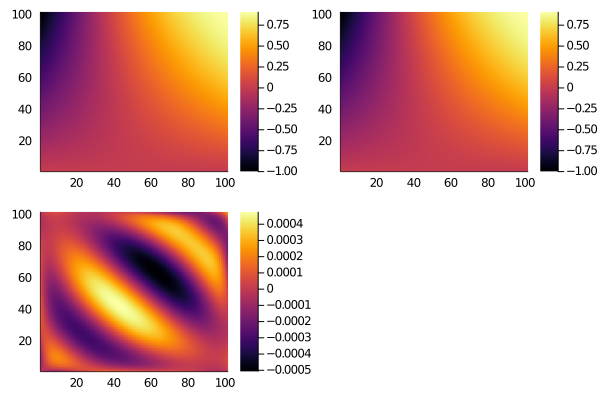

In [273]:
nodes = 10
f(x) = x[2]*x[1]^2-x[1]+sin(4*x[1]*x[2]*x[3])
itp_3d = TP_chebyshev.init_interpolation([0.0,0.0,0.0],[1.0,1.0,1.0],nodes)

# compute value of function at nodes
values = zeros(nodes,nodes,nodes)
for i in 1:nodes
    for j in 1:nodes
        for k in 1:nodes
        values[i,j,k] = f([itp_3d.nodes[i,1],itp_3d.nodes[j,2],itp_3d.nodes[k,3]])
        end
    end
end 

x = 0:0.01:1
itp_3d= TP_chebyshev.update_interpolation(itp_3d, values)

xy = collect(Iterators.product(x,x,0.5))

# calcualte true values on grid
v = f.(reshape(xy,length(xy)))
p1 = Plots.heatmap(reshape(v, length(x),length(x)))

# calcualte interpolated values on grid
v_itp = TP_chebyshev.evaluate_interpolation(reshape(xy,length(xy)),itp_3d)
p2 = Plots.heatmap(reshape(v_itp, length(x),length(x)))
 
# calcualte residuals 
p3 = Plots.heatmap(reshape(v_itp .- v, length(x),length(x)))


# make plot!
Plots.plot(p1,p2,p3)


### Define a function to interpolate in 5D

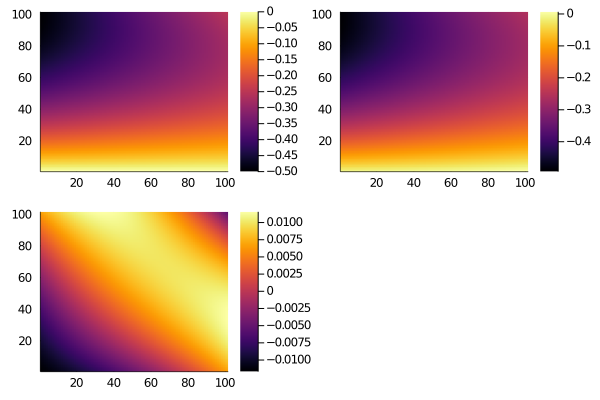

In [275]:
nodes = 3
f(x) = x[2]*x[1]^2-x[1]+sin(2*x[1]*x[2]*x[3]*x[4]*x[5])
itp_5d = TP_chebyshev.init_interpolation([0.0,0.0,0.0,0.0,0.0],[1.0,1.0,1.0,1.0,1.0],nodes)

# compute value of function at nodes
values = zeros(nodes,nodes,nodes,nodes,nodes)
for i in 1:nodes
    for j in 1:nodes
        for k in 1:nodes
            for l in 1:nodes
                for m in 1:nodes
                    values[i,j,k,l,m] = f([itp_5d.nodes[i,1],itp_5d.nodes[j,2],itp_5d.nodes[k,3],itp_5d.nodes[l,4],itp_5d.nodes[m,5]])
                end
            end
        end
    end
end 

x = 0:0.01:1
itp_5d= TP_chebyshev.update_interpolation(itp_5d, values)

xy = collect(Iterators.product(x,0.5,x,0.5,0.5))

# calcualte true values on grid
v = f.(reshape(xy,length(xy)))
p1 = Plots.heatmap(reshape(v, length(x),length(x)))

# calcualte interpolated values on grid
v_itp = TP_chebyshev.evaluate_interpolation(reshape(xy,length(xy)),itp_5d)
p2 = Plots.heatmap(reshape(v_itp, length(x),length(x)))
 
# calcualte residuals 
p3 = Plots.heatmap(reshape(v_itp .- v, length(x),length(x)))


# make plot!
Plots.plot(p1,p2,p3)